In [23]:
import pymysql
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")

In [2]:
conn=pymysql.connect(
host='localhost',
user='root',
password='root',
db='crime_data'
)

In [3]:
print(conn)
query1 = "select * from crimes"
df=pd.read_sql(query1,conn)
df

,DR_NO,Date_Rptd,DATE_OCC,AREA_NAME,Crm_Cd,Crm_Cd_Desc,Vict_Age,Vict_Sex,Premis_Desc,Status,Location,LAT,LON
0,10304468,2020-08-01,2020-08-01,Southwest,624,BATTERY - SIMPLE ASSAULT,36,F,SINGLE FAMILY DWELLING,AO,1100 W 39TH PL,34.01,-118.30
1,190101086,2020-02-01,2020-01-01,Central,624,BATTERY - SIMPLE ASSAULT,25,M,SIDEWALK,IC,700 S HILL ST,34.05,-118.25
2,191501505,2020-01-01,2020-01-01,N Hollywood,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),76,F,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",IC,5400 CORTEEN PL,34.17,-118.40
3,191921269,2020-01-01,2020-01-01,Mission,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",31,X,BEAUTY SUPPLY STORE,IC,14400 TITUS ST,34.22,-118.45
4,200100502,2020-02-01,2020-02-01,Central,442,SHOPLIFTING - PETTY THEFT ($950 & UNDER),23,M,DEPARTMENT STORE,IC,700 S FIGUEROA ST,34.05,-118.26
...,...,...,...,...,...,...,...,...,...,...,...,...,...
494,211507896,2021-11-04,2020-07-11,N Hollywood,354,THEFT OF IDENTITY,31,M,SINGLE FAMILY DWELLING,IC,100 W WASHINGTON BL,34.21,-118.41
495,211613998,2021-08-11,2020-01-11,Foothill,354,THEFT OF IDENTITY,64,F,SINGLE FAMILY DWELLING,IC,WESTLAKE,34.27,-118.36
496,211715638,2021-01-12,2020-09-12,Devonshire,354,THEFT OF IDENTITY,56,F,SINGLE FAMILY DWELLING,IC,BURLINGTON,34.28,-118.47
497,220705246,2022-03-02,2020-11-02,Wilshire,341,"THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LI...",57,F,SINGLE FAMILY DWELLING,IC,7900 WOODMAN AV,34.06,-118.34


In [4]:
df.Premis_Desc.describe()

count        499
unique        67
top       STREET
freq         105
Name: Premis_Desc, dtype: object

In [5]:
df.Crm_Cd.describe()

count    499.000000
mean     504.178357
std      198.381863
min      210.000000
25%      330.000000
50%      442.000000
75%      624.000000
max      956.000000
Name: Crm_Cd, dtype: float64

In [6]:
#unique values 
df.Crm_Cd.unique()

array([624, 745, 740, 442, 946, 341, 330, 930, 648, 230, 350, 310, 480,
       623, 440, 510, 210, 888, 761, 420, 421, 647, 354, 662, 220, 625,
       755, 900, 320, 901, 956, 920, 850, 666, 351, 343, 890, 886, 649,
       820, 812, 940], dtype=int64)

In [7]:
df.Vict_Sex.unique()

array(['F', 'M', 'X', ''], dtype=object)

In [8]:
df.AREA_NAME.unique()

array(['Southwest', 'Central', 'N Hollywood', 'Mission', 'Rampart',
       'Hollenbeck', 'Harbor', 'Hollywood', 'Wilshire', 'West LA',
       'Van Nuys', 'West Valley', 'Northeast', '77th Street', 'Foothill',
       'Southeast', 'Pacific', 'Devonshire', 'Olympic'], dtype=object)

In [9]:
df.Status.unique()

array(['AO', 'IC', 'AA', 'JO'], dtype=object)

In [10]:
#crime codes and their description
distinct_crime_codes = df[['Crm_Cd', 'Crm_Cd_Desc']].drop_duplicates()
distinct_crime_codes

,Crm_Cd,Crm_Cd_Desc
0,624,BATTERY - SIMPLE ASSAULT
2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER)
3,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA..."
4,442,SHOPLIFTING - PETTY THEFT ($950 & UNDER)
5,946,OTHER MISCELLANEOUS CRIME
6,341,"THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LI..."
7,330,BURGLARY FROM VEHICLE
8,930,CRIMINAL THREATS - NO WEAPON DISPLAYED
10,648,ARSON
12,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT"


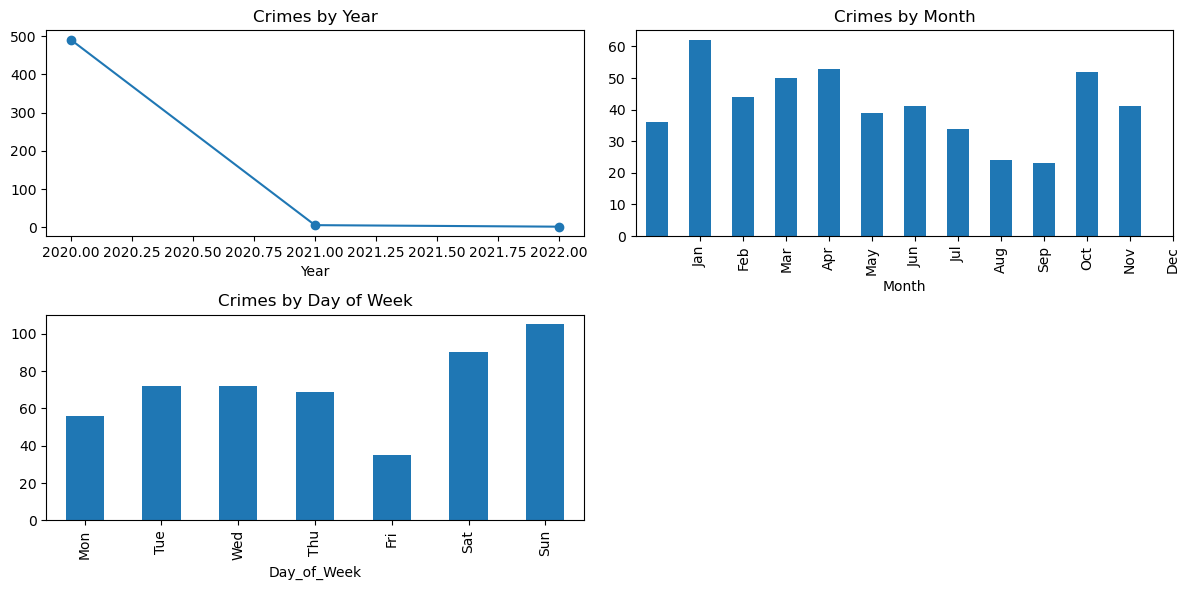

In [11]:
#Temporal analysis
# Convert 'Date' column to datetime type
df['Date_Rptd'] = pd.to_datetime(df['Date_Rptd'])

# Extract year, month, day of week from the 'Date' column
df['Year'] = df['Date_Rptd'].dt.year
df['Month'] = df['Date_Rptd'].dt.month
df['Day_of_Week'] = df['Date_Rptd'].dt.dayofweek  # Monday=0, Sunday=6

# Group by year and count the number of crimes
crimes_by_year = df.groupby('Year').size()

# Group by month and count the number of crimes
crimes_by_month = df.groupby('Month').size()

# Group by day of week and count the number of crimes
crimes_by_dayofweek = df.groupby('Day_of_Week').size()

# Plotting
plt.figure(figsize=(12, 6))

plt.subplot(2, 2, 1)
crimes_by_year.plot(kind='line', marker='o', title='Crimes by Year')

plt.subplot(2, 2, 2)
crimes_by_month.plot(kind='bar', title='Crimes by Month')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

plt.subplot(2, 2, 3)
crimes_by_dayofweek.plot(kind='bar', title='Crimes by Day of Week')
plt.xticks(range(7), ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])

plt.tight_layout()
plt.show()


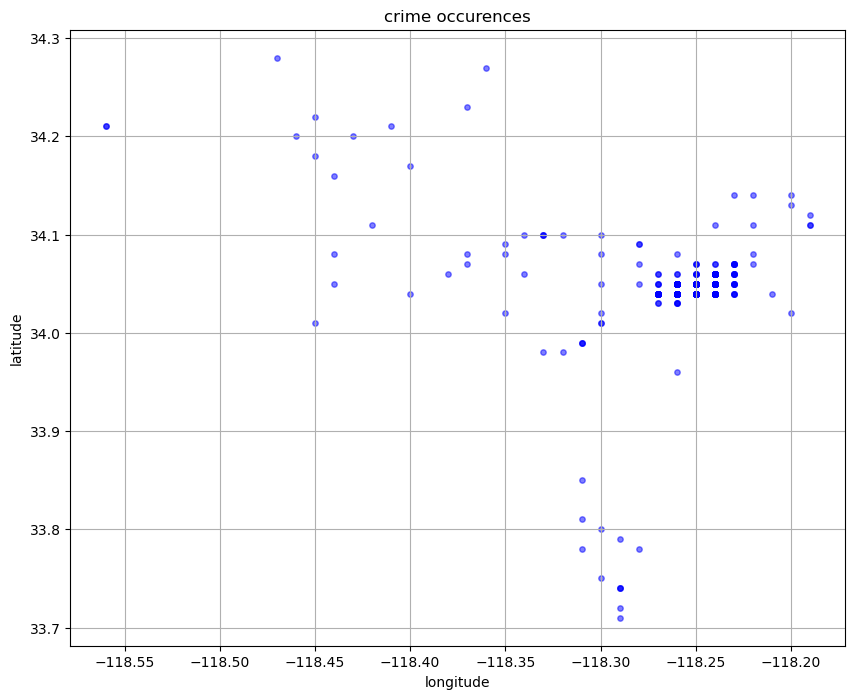

In [25]:
#spatial analysis
plt.figure(figsize=(10,8))
plt.scatter(df['LON'],df['LAT'],s=15,alpha=0.5,c='blue')
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.title('crime occurences')
plt.grid()
plt.show()

st=px.scatter(df,x='LON',y='LAT',title='crime occurences')
st.show()

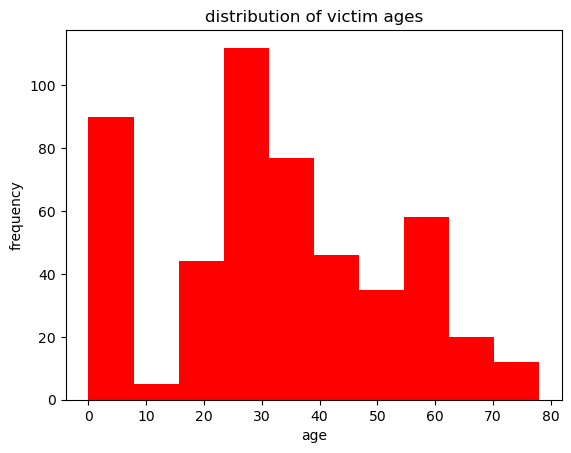

In [12]:
#Distribution of victim ages and gender 

plt.hist(df["Vict_Age"],color='red')
plt.title("distribution of victim ages")
plt.xlabel("age")
plt.ylabel("frequency")
plt.grid(False)
plt.show()

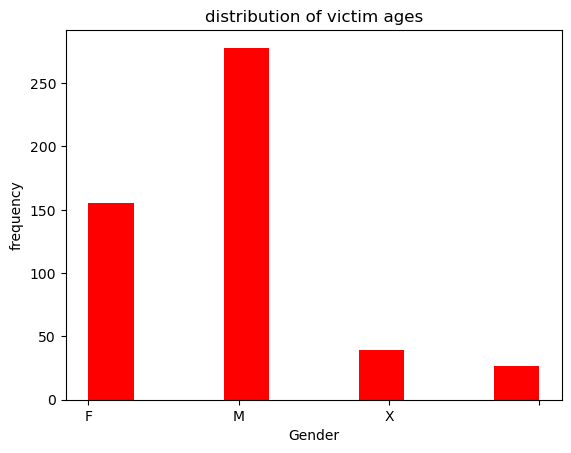

In [13]:
 #Distribution of victim gender 
plt.hist(df["Vict_Sex"],color='red')
plt.title("distribution of victim ages")
plt.xlabel("Gender")
plt.ylabel("frequency")
plt.grid(False)
plt.show()

In [16]:
#where do most crimes occur based on location column
cur=conn.cursor()
print(cur)
cur.execute("SELECT count(*),Location FROM crimes GROUP BY Location ORDER BY count(*) desc LIMIT 8; ")
data=cur.fetchall()
data

((14, '800 N ALAMEDA ST'),
 (11, '700 W 7TH ST'),
 (6, '1100 S FIGUEROA ST'),
 (6, '300 E 5TH ST'),
 (6, '6TH'),
 (5, '500 S SAN PEDRO ST'),
 (5, '100 E 5TH ST'),
 (5, '7TH ST'))

In [17]:
df2=pd.DataFrame(data,columns=['count','location'])
df2

,count,location
0,14,800 N ALAMEDA ST
1,11,700 W 7TH ST
2,6,1100 S FIGUEROA ST
3,6,300 E 5TH ST
4,6,6TH
5,5,500 S SAN PEDRO ST
6,5,100 E 5TH ST
7,5,7TH ST


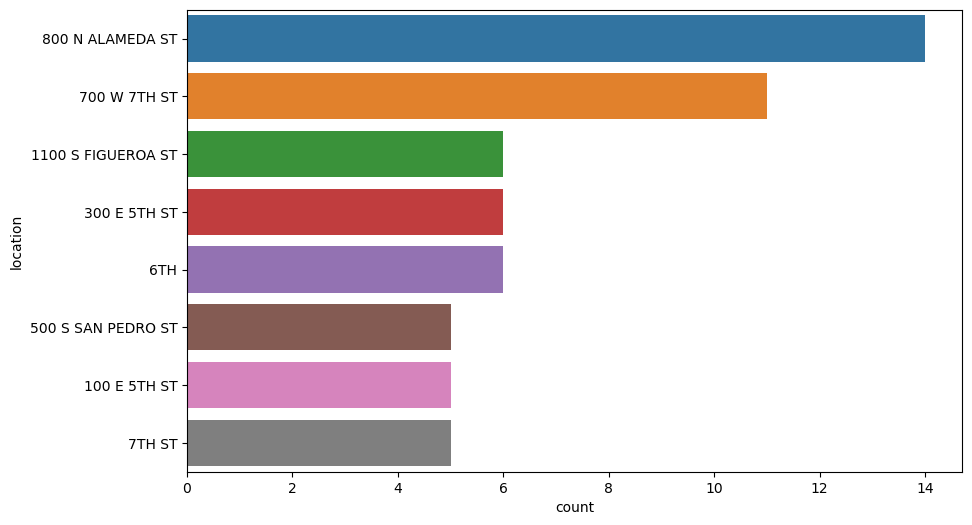

In [18]:
plt.figure(figsize=(10,6))
sns.barplot(df2,x='count',y='location')
plt.show()

In [19]:
# crime code analysis
query4="SELECT Crm_Cd,Crm_Cd_Desc,count(*) as total from crimes GROUP BY Crm_Cd,Crm_Cd_Desc ORDER BY total"
df4=pd.read_sql(query4,conn)
df4

,Crm_Cd,Crm_Cd_Desc,total
0,890,FAILURE TO YIELD,1
1,920,KIDNAPPING - GRAND ATTEMPT,1
2,666,"BUNCO, ATTEMPT",1
3,343,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),1
4,649,DOCUMENT FORGERY / STOLEN FELONY,1
5,755,BOMB SCARE,1
6,647,THROWING OBJECT AT MOVING VEHICLE,1
7,820,ORAL COPULATION,1
8,812,CRM AGNST CHLD (13 OR UNDER) (14-15 & SUSP 10 ...,1
9,940,EXTORTION,1


In [20]:
data=df.groupby('Crm_Cd').size().reset_index(name='Numbers')
data

,Crm_Cd,Numbers
0,210,12
1,220,4
2,230,24
3,310,16
4,320,2
5,330,82
6,341,26
7,343,1
8,350,9
9,351,2


In [27]:
st=px.scatter(data,x="Crm_Cd",y="Numbers",title="numbers of crimes with respect to crimecode")
st.show()